In [1]:
import numpy as np
import seaborn as sns
import scipy
import scipy.stats as stats
import pandas as pd

import pymc as pm
from pymc import fit
import arviz as az
RANDOM_SEED = 20090425

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
import numpy as np
import seaborn as sns
import scipy
import scipy.stats as stats

In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
df = pd.read_csv("C:/Users/anjal/Downloads/WalmartSalesDataset.csv", index_col=0)
df.head()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Most_Used_Payment_Method,Location,Season,No_of_Subscribers,Sales_per_customer,Date
Store,,,,,,,,,,,,
1,1643690.90,0,42.31,2.572,211.096358,8.106,Venmo,Kentucky,Winter,265,314.640015,05-02-2010
1,1641957.44,1,38.51,2.548,211.242170,8.106,Cash,Maine,Winter,237,311.359985,12-02-2010
1,1611968.17,0,39.93,2.514,211.289143,8.106,Credit Card,Massachusetts,Spring,281,309.720001,19-02-2010
1,1409727.59,0,46.63,2.561,211.319643,8.106,PayPal,Rhode Island,Spring,125,288.420013,26-02-2010
1,1554806.68,0,46.50,2.625,211.350143,8.106,PayPal,Oregon,Spring,224,285.140015,05-03-2010


In [5]:
pd.set_option("display.max_columns", 60)
pd.set_option("display.float_format", '{:.2f}'.format)

In [6]:
df.head(6500)

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Most_Used_Payment_Method,Location,Season,No_of_Subscribers,Sales_per_customer,Date
Store,,,,,,,,,,,,
1,1643690.90,0,42.31,2.57,211.10,8.11,Venmo,Kentucky,Winter,265,314.64,05-02-2010
1,1641957.44,1,38.51,2.55,211.24,8.11,Cash,Maine,Winter,237,311.36,12-02-2010
1,1611968.17,0,39.93,2.51,211.29,8.11,Credit Card,Massachusetts,Spring,281,309.72,19-02-2010
1,1409727.59,0,46.63,2.56,211.32,8.11,PayPal,Rhode Island,Spring,125,288.42,26-02-2010
1,1554806.68,0,46.50,2.62,211.35,8.11,PayPal,Oregon,Spring,224,285.14,05-03-2010
...,...,...,...,...,...,...,...,...,...,...,...,...
45,713173.95,0,64.88,4.00,192.01,8.68,Venmo,Kentucky,Spring,191,38.56,28-09-2012
45,733455.07,0,64.89,3.98,192.17,8.67,Venmo,Arizona,Summer,109,38.56,05-10-2012
45,734464.36,0,54.47,4.00,192.33,8.67,Credit Card,New York,Fall,288,252.83,12-10-2012


In [7]:
# list the column names
df.columns

Index(['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Most_Used_Payment_Method', 'Location', 'Season',
       'No_of_Subscribers', 'Sales_per_customer', 'Date'],
      dtype='object')

In [8]:
#dropping columns 
#df.drop(columns=['Payment_Method', 'Location', 'Season'], inplace=True)
df.drop(columns=['Most_Used_Payment_Method', 'Location', 'Season','Date'], inplace=True)

In [9]:
df.isna().sum().sum()

0

In [10]:
df.head(2)

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,No_of_Subscribers,Sales_per_customer
Store,,,,,,,,
1,1643690.90,0,42.31,2.57,211.10,8.11,265,314.64
1,1641957.44,1,38.51,2.55,211.24,8.11,237,311.36


In [11]:
df.to_csv('walmart_weekly_dataset.csv')

In [12]:
#calculating mean of each column
df_mean = df.mean()
df_mean

Weekly_Sales         1046964.88
Holiday_Flag               0.07
Temperature               60.66
Fuel_Price                 3.36
CPI                      171.58
Unemployment               8.00
No_of_Subscribers        199.05
Sales_per_customer       179.49
dtype: float64

In [13]:
#calculating variance of each column
df_var=df.var()
df_var

Weekly_Sales         318509684088.30
Holiday_Flag                    0.07
Temperature                   340.22
Fuel_Price                      0.21
CPI                          1548.95
Unemployment                    3.52
No_of_Subscribers            3362.92
Sales_per_customer          16385.77
dtype: float64

In [14]:
alpha_mom= ((df_mean)**2)/df_var
beta_mom=df_var/df_mean

alpha_mom, beta_mom

(Weekly_Sales          3.44
 Holiday_Flag          0.08
 Temperature          10.82
 Fuel_Price           53.54
 CPI                  19.01
 Unemployment         18.18
 No_of_Subscribers    11.78
 Sales_per_customer    1.97
 dtype: float64,
 Weekly_Sales         304221.94
 Holiday_Flag              0.93
 Temperature               5.61
 Fuel_Price                0.06
 CPI                       9.03
 Unemployment              0.44
 No_of_Subscribers        16.89
 Sales_per_customer       91.29
 dtype: float64)

In [15]:
df.describe()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,No_of_Subscribers,Sales_per_customer
count,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00,6435.00
mean,1046964.88,0.07,60.66,3.36,171.58,8.00,199.05,179.49
std,564366.62,0.26,18.44,0.46,39.36,1.88,57.99,128.01
min,209986.25,0.00,-2.06,2.47,126.06,3.88,100.00,7.49
25%,553350.10,0.00,47.46,2.93,131.74,6.89,149.00,94.05
50%,960746.04,0.00,62.67,3.44,182.62,7.87,200.00,148.50
75%,1420158.66,0.00,74.94,3.73,212.74,8.62,249.00,254.98
max,3818686.45,1.00,100.14,4.47,227.23,14.31,300.00,1485.00


In [16]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats.distributions import gamma

#df.Unemployment.hist(density =True, bins=60)
#plt.plot(np.linspace(90, 50,100), gamma.pdf(np.linspace(90, 50,100), a = alpha_mom, scale = beta_mom))

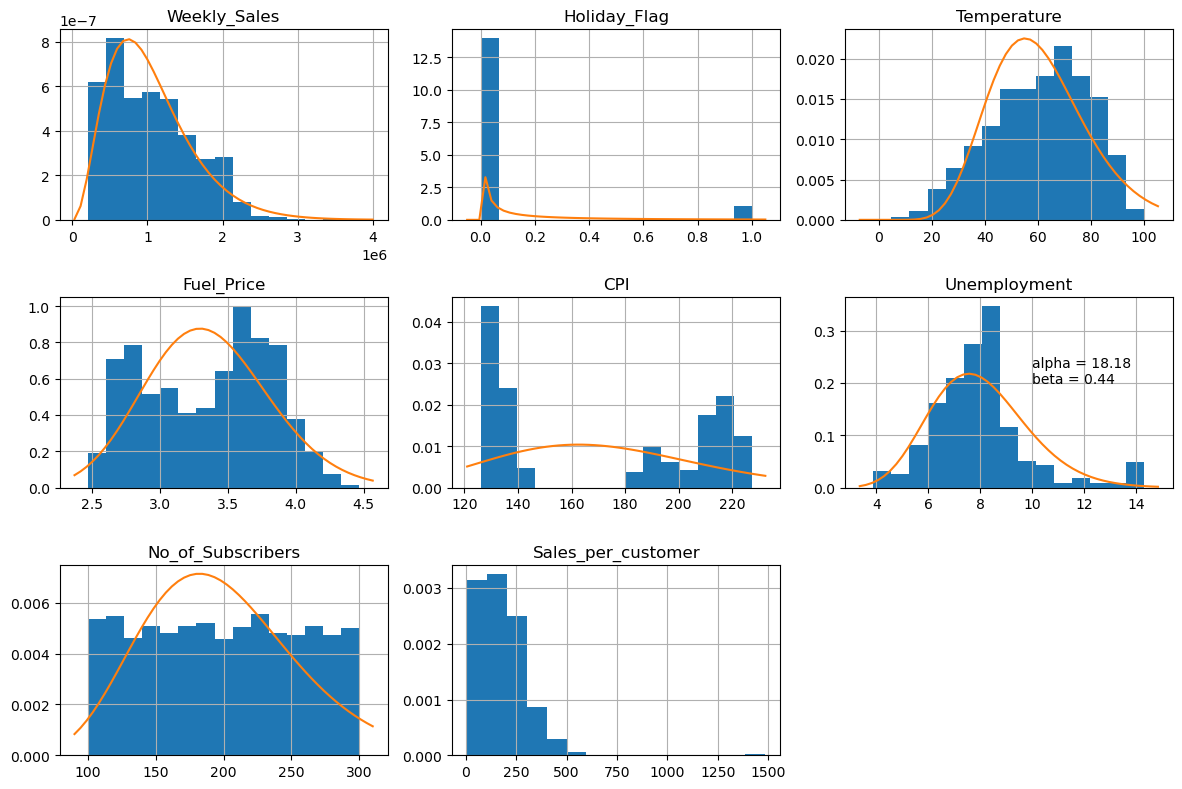

In [17]:
axs = df.hist(density=True, figsize=(12, 8), bins=15, grid=True)

for ax in axs.ravel()[:7]:
    
    # Get title
    m = ax.get_title()
    
    # Plot fitted distribution
    x = np.linspace(*ax.get_xlim())
    ax.plot(x, gamma.pdf(x, a=alpha_mom[m], scale=beta_mom[m]))
    
    # Annotate with parameter estimates
    label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom[m], beta_mom[m])
    ax.annotate(label, xy=(10, 0.2))
    
plt.tight_layout()

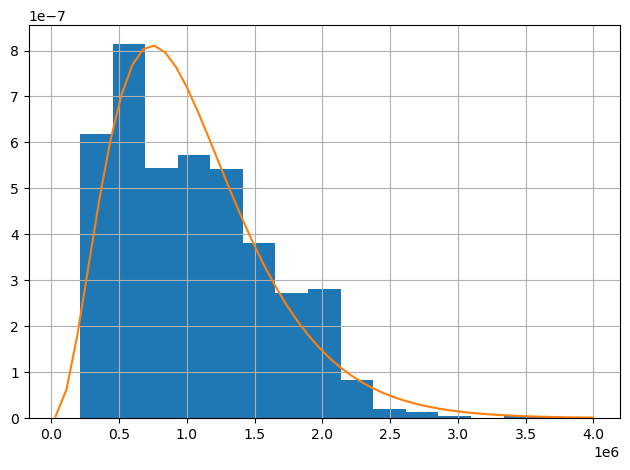

In [18]:
from scipy.stats.distributions import gamma

axes=df.Weekly_Sales.hist(density=True, bins=15, grid=True)
# m = axes.get_title()
m="Weekly_Sales"
# # Plot fitted distribution
x = np.linspace(*axes.get_xlim())
axes.plot(x, gamma.pdf(x, a=alpha_mom[m], scale=beta_mom[m]))

# # Annotate with parameter estimates
label = 'alpha = {0:.2f}\nbeta = {1:.2f}'.format(alpha_mom[m], beta_mom[m])
axes.annotate(label, xy=(10, 0.2))

plt.tight_layout()


In [19]:
from scipy import stats
# Calculate the probability of observing a specific value
probability_at_x = stats.gamma.pdf(1, a=alpha_mom[m], scale=beta_mom[m])
probability_at_x

4.326076155843613e-20

In [20]:
# Calculate the 90th percentile
percentile_90 = stats.gamma.ppf(0.9, a=alpha_mom[m], scale=beta_mom[m])
percentile_90

1803716.304341608

In [21]:
# Construct a 95% prediction interval
lower_bound = stats.gamma.ppf(0.025, a=alpha_mom[m], scale=beta_mom[m])
upper_bound = stats.gamma.ppf(0.975, a=alpha_mom[m], scale=beta_mom[m])
lower_bound,upper_bound

(248671.30538007067, 2408225.5984906694)

In [22]:
# Calculate the expected value (mean) of the distribution
expected_value = alpha_mom[m] * beta_mom[m]
expected_value

1046964.8775617715

In [23]:
from scipy.special import psi, polygamma

# Note that log_mean and mean_log are parameters of the dlgamma function
dlgamma = lambda m, log_mean, mean_log: np.log(m) - psi(m) - log_mean + mean_log
dl2gamma = lambda m, *args: 1./m - polygamma(1, m)

In [24]:
df1= df['Weekly_Sales']

In [25]:
# Calculate statistics
import numpy as np
log_mean = np.log(df1.mean())
mean_log = df1.apply(np.log).mean()


In [26]:
df1_mean = df1.mean()
df1_mean

df1_var = df1.var()
df1_var

alpha_mom1 = df1_mean ** 2 / df1_var
beta_mom1 = df1_var / df1_mean
alpha_mom1, beta_mom1

(3.4414509498683, 304221.938017695)

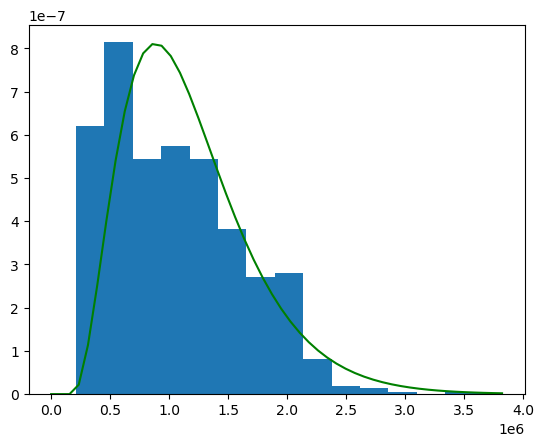

In [27]:
from scipy.stats.distributions import gamma

param = gamma.fit(df1)
location = param[1]
df1.hist(density=True, bins=15, grid=False)
x1 = np.linspace(0, df1.max())
plt.plot(x1, gamma.pdf(x, a=alpha_mom1, loc=location, scale=beta_mom1), 'g-')
# plt.plot(y, pdf_fitted, 'r-', lw=2, label='Fitted Gamma Distribution')

In [28]:
df_transformed = df.drop("Holiday_Flag", axis = 1)
df_transformed.head()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,No_of_Subscribers,Sales_per_customer
Store,,,,,,,
1,1643690.90,42.31,2.57,211.10,8.11,265,314.64
1,1641957.44,38.51,2.55,211.24,8.11,237,311.36
1,1611968.17,39.93,2.51,211.29,8.11,281,309.72
1,1409727.59,46.63,2.56,211.32,8.11,125,288.42
1,1554806.68,46.50,2.62,211.35,8.11,224,285.14


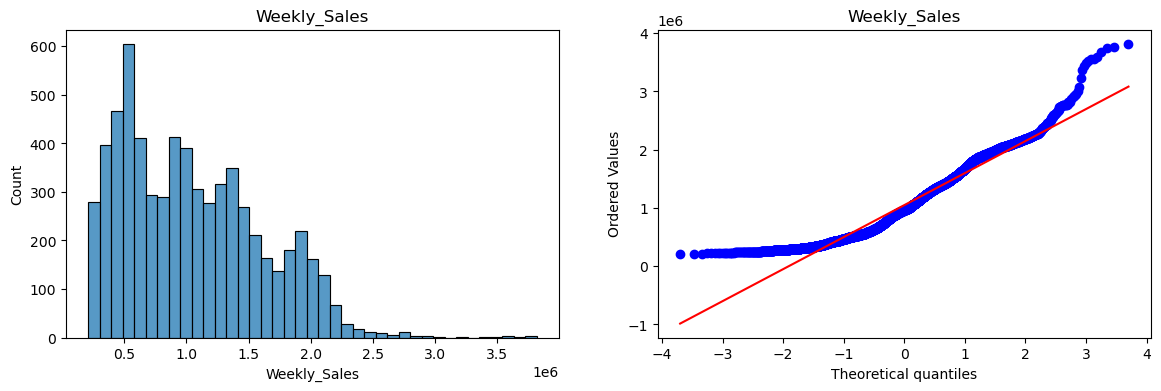

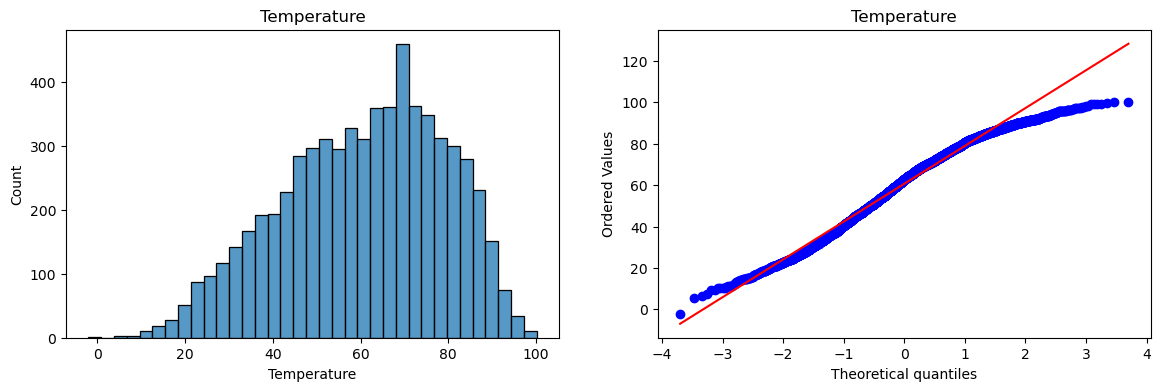

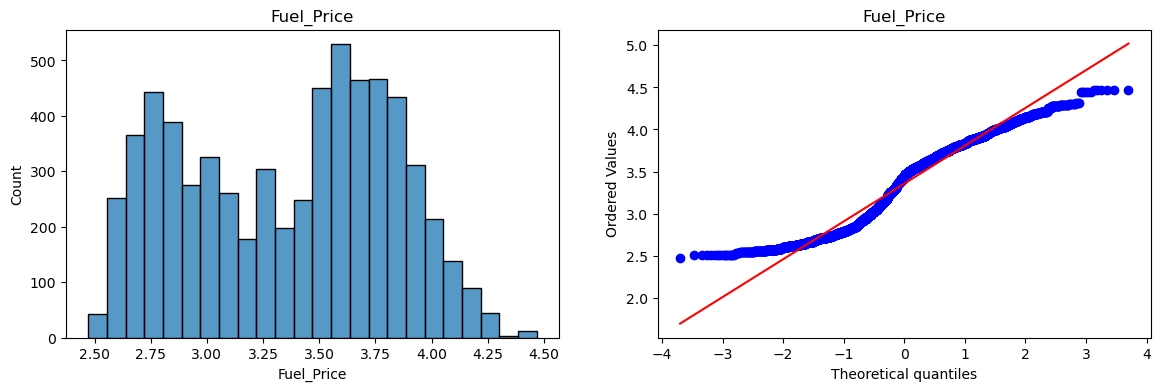

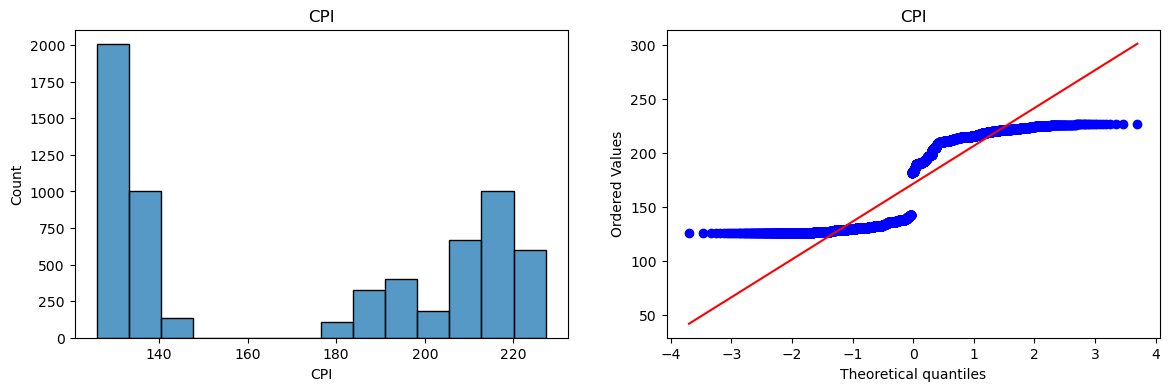

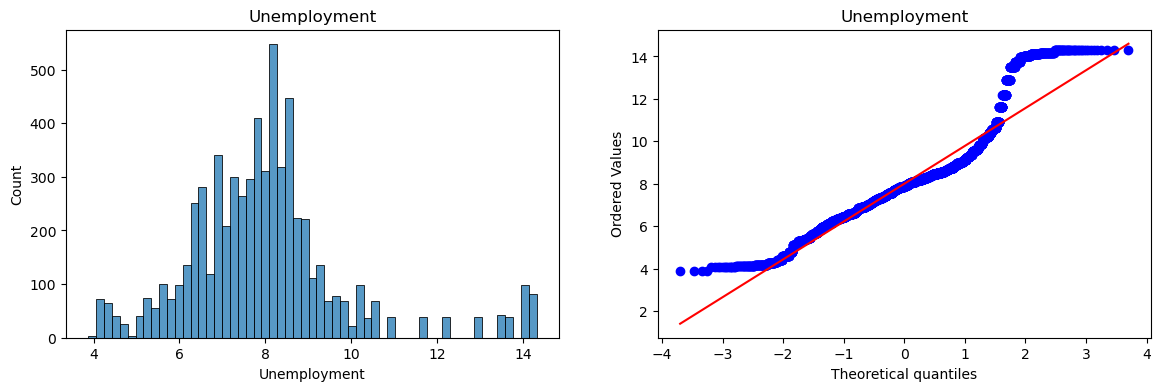

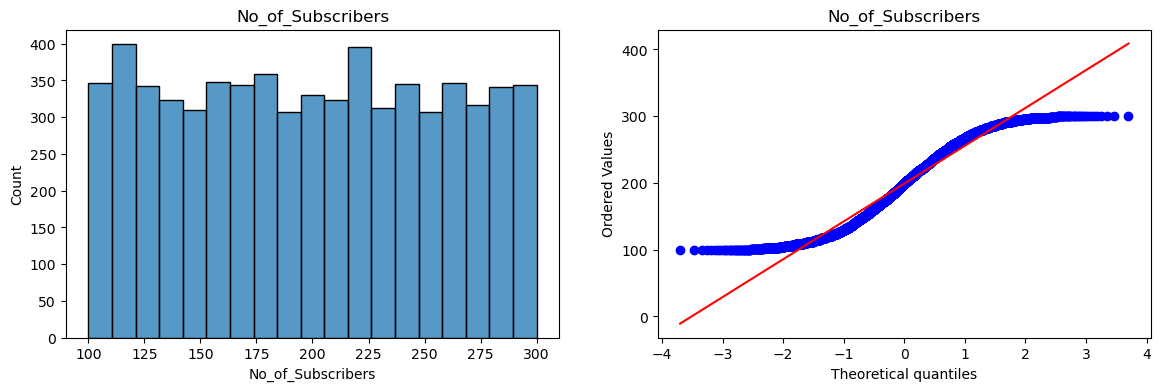

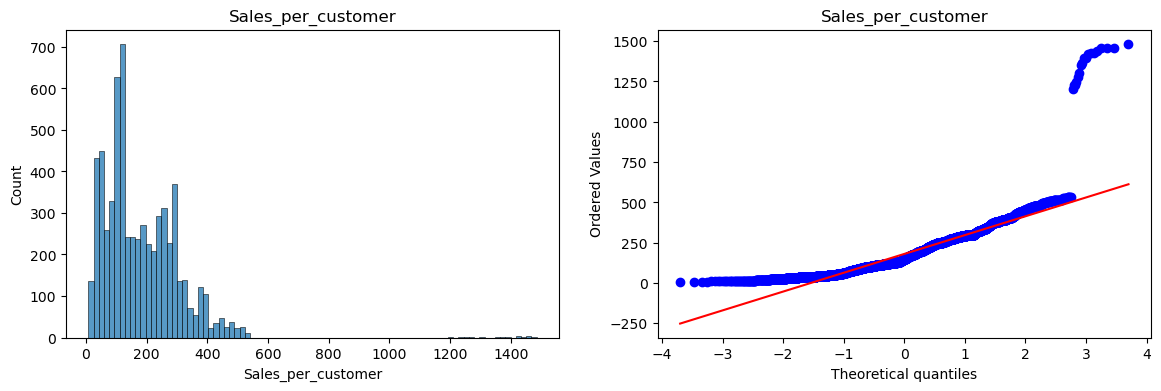

In [29]:
for column in df_transformed.columns : 
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    sns.histplot(df_transformed[column])
    plt.title(column)
    
    plt.subplot(122)
    stats.probplot(df_transformed[column],dist = 'norm', plot = plt)
    plt.title(column)
    plt.show()

In [30]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(output_distribution='normal')

for col in df_transformed.columns:
    df_transformed[col] = df_transformed[col] = qt.fit_transform(pd.DataFrame(df_transformed[col]))

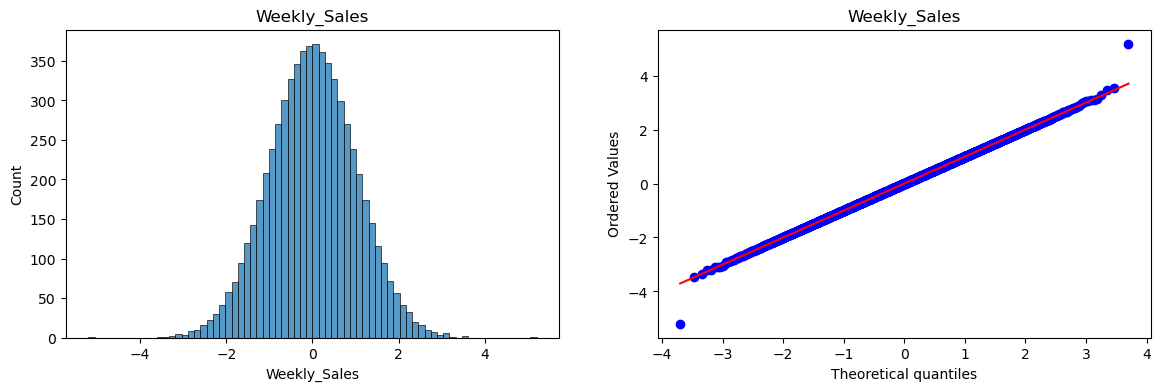

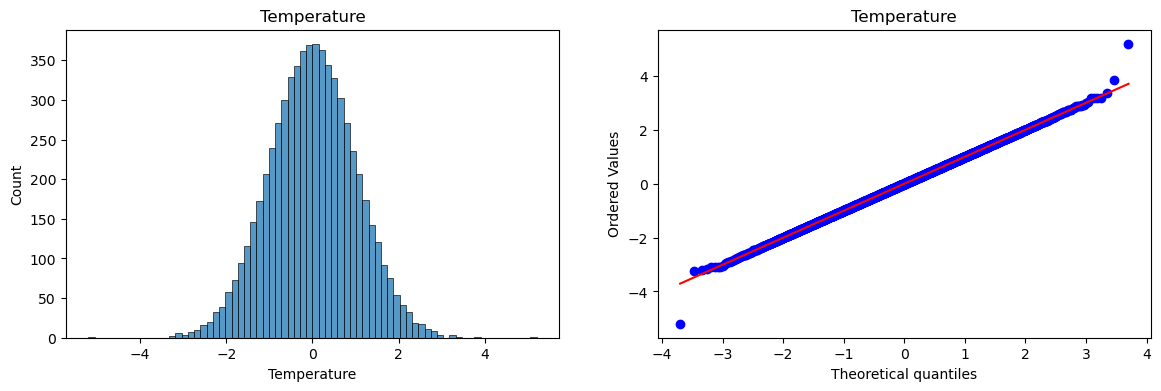

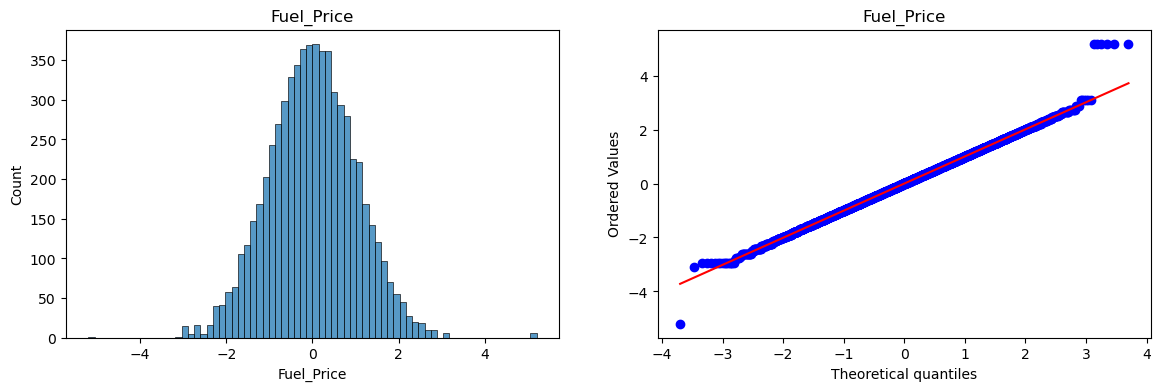

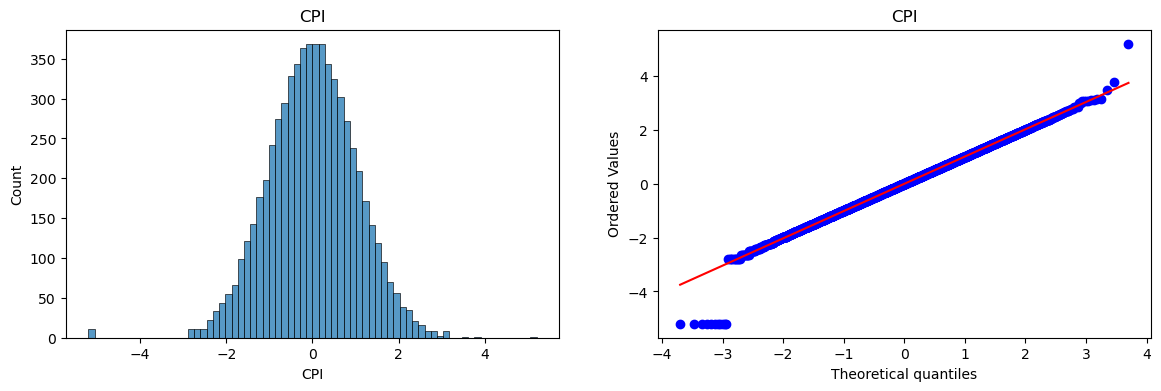

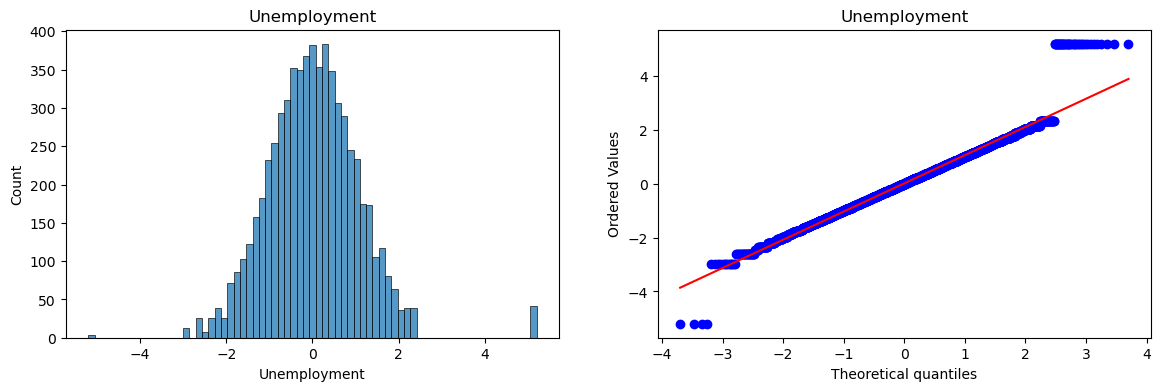

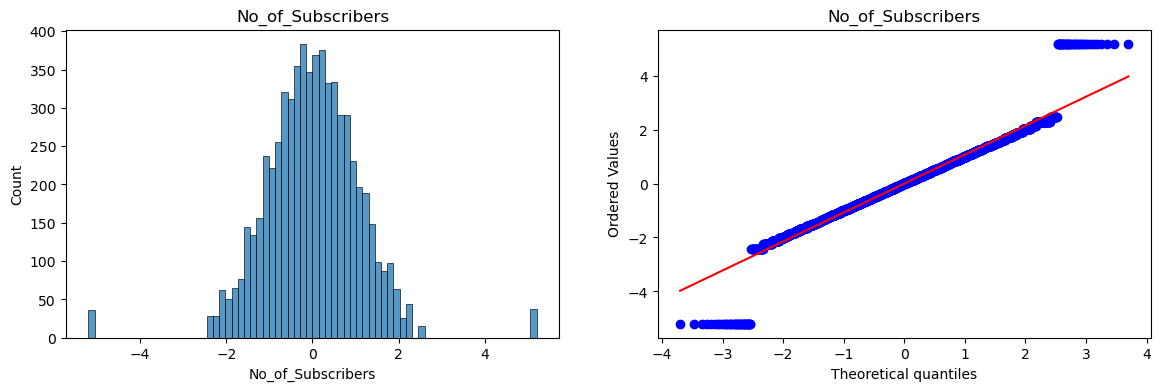

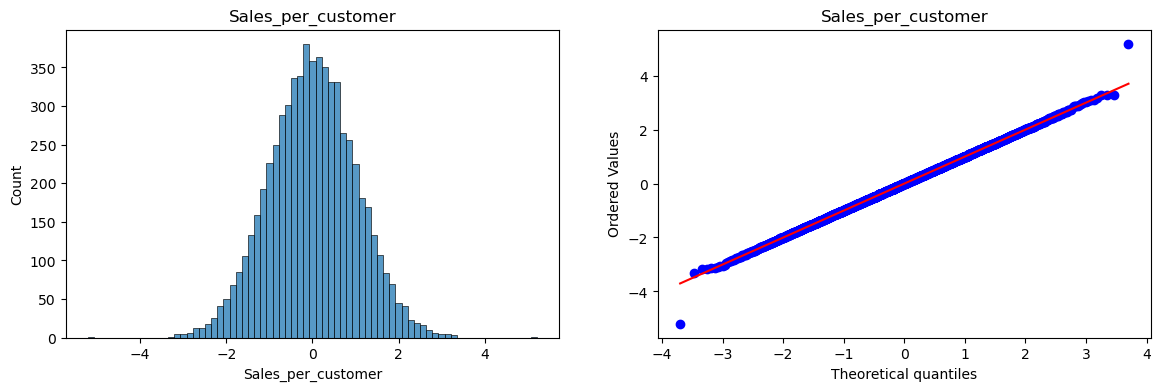

In [31]:
for column in df_transformed.columns : 
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    sns.histplot(df_transformed[column])
    plt.title(column)
    
    plt.subplot(122)
    stats.probplot(df_transformed[column],dist = 'norm', plot = plt)
    plt.title(column)
    plt.show()

Implementing the Baysian Regression on the Data Set 

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [beta_temperature, beta_fuel_price, beta_cpi, beta_unemployment, beta_salesPerCustomer, beta_No_of_Subscribers, alpha, sigma]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 36 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


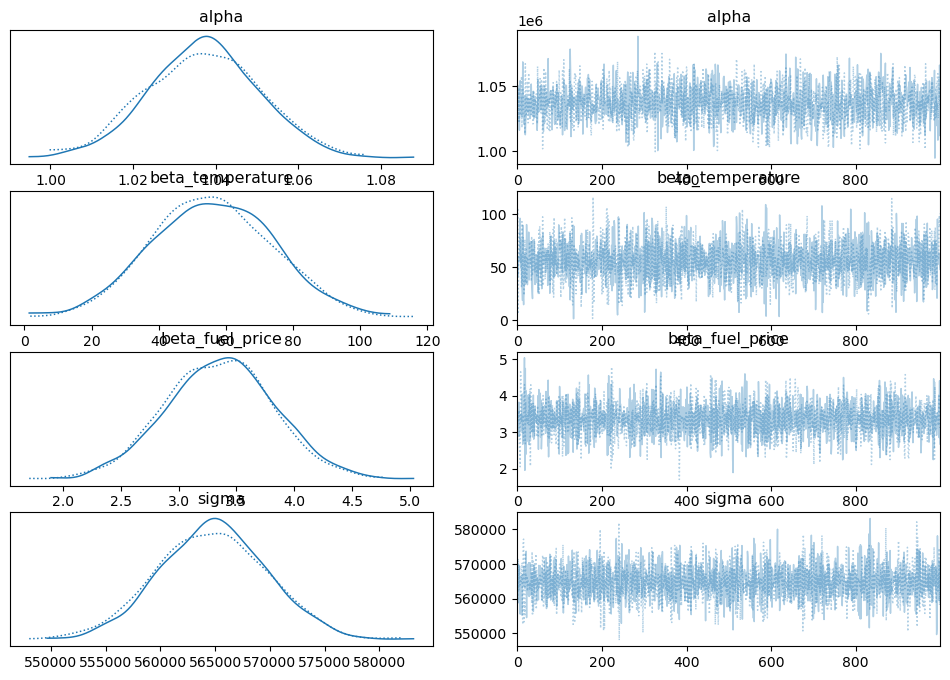

                             mean       sd     hdi_3%    hdi_97%  mcse_mean  \
beta_temperature            56.00    18.35      21.73      90.16       0.28   
beta_fuel_price              3.36     0.46       2.50       4.26       0.01   
beta_cpi                   114.95    39.06      39.98     183.31       0.77   
beta_unemployment            8.03     1.86       4.51      11.31       0.03   
beta_salesPerCustomer      -75.24    50.83    -173.89      15.62       1.10   
beta_No_of_Subscribers     198.77    58.27      91.02     303.78       0.97   
alpha                  1037086.18 13501.59 1012535.54 1062378.01     314.93   
sigma                   564799.91  5014.40  555702.34  574445.41      78.13   

                        mcse_sd  ess_bulk  ess_tail  r_hat  
beta_temperature           0.22   4211.00   1554.00   1.00  
beta_fuel_price            0.01   4573.00   1437.00   1.00  
beta_cpi                   0.57   2600.00   1585.00   1.00  
beta_unemployment          0.02   4076.00   

Finished [100%]: Average Loss = 1.2261e+11


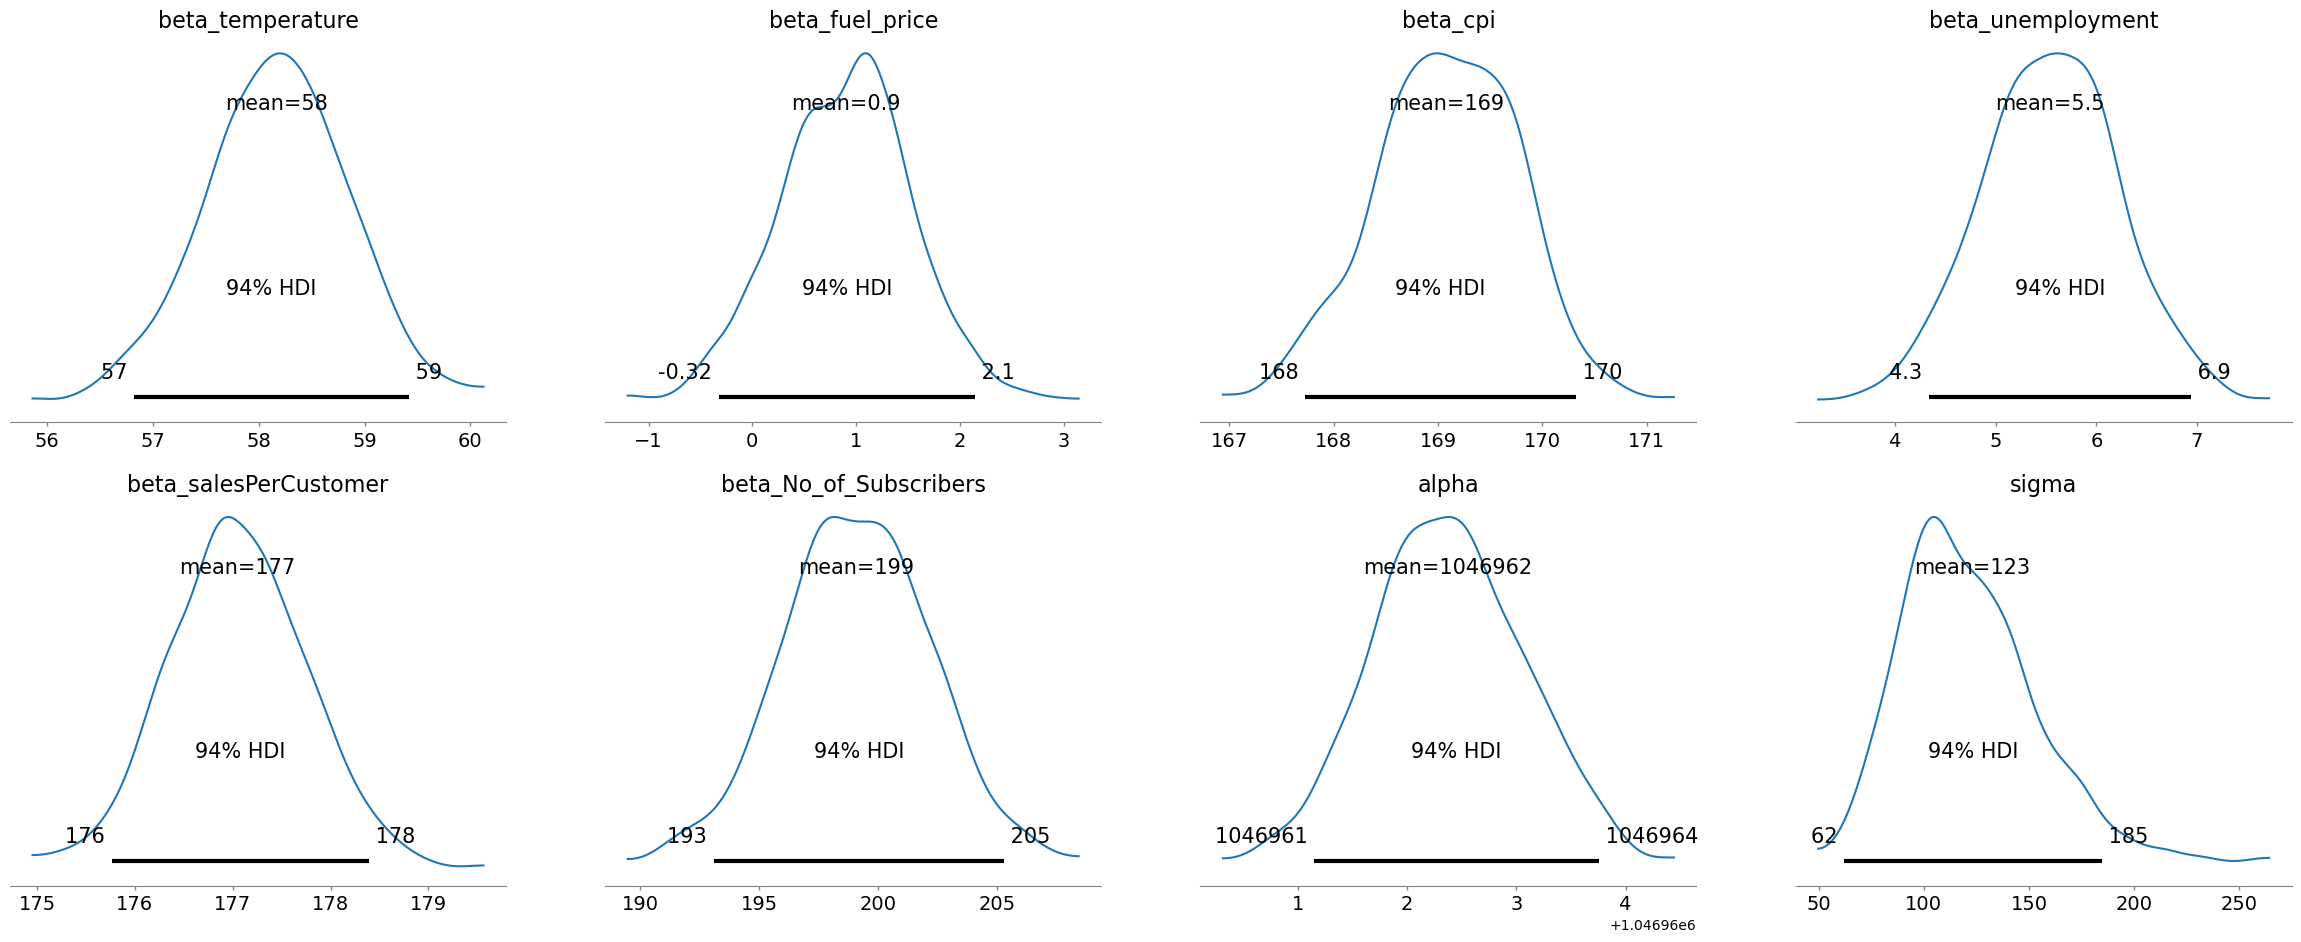

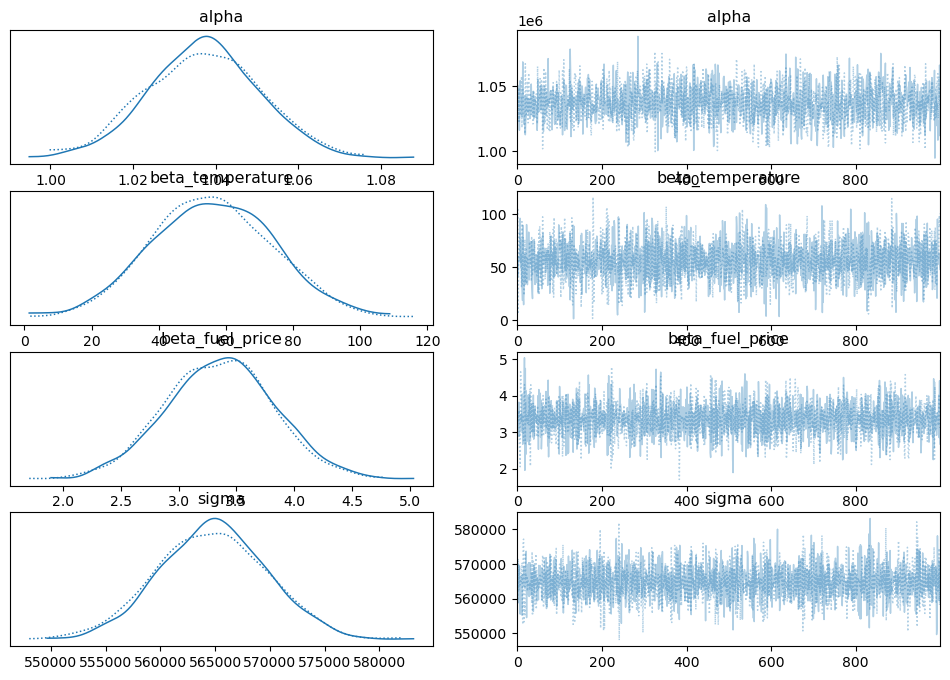

In [32]:
# Load the Walmart dataset
df = pd.read_csv('C:/Users/anjal/Downloads/WalmartSalesDataset.csv')
df.drop(columns=['Most_Used_Payment_Method', 'Location', 'Season','Date'], inplace=True)
means = df.mean()
std_devs = df.std()

# Bayesian Estimation 
with pm.Model() as walmart_model:
    # Priors for coefficients using actual mean and standard deviation from the data
    beta_temperature = pm.Normal('beta_temperature', mu=means[3], sigma=std_devs[3])
    beta_fuel_price = pm.Normal('beta_fuel_price', mu=means[4], sigma=std_devs[4])
    beta_cpi = pm.Normal('beta_cpi',mu=means[5], sigma=std_devs[5])
    beta_unemployment = pm.Normal('beta_unemployment', mu=means[6], sigma=std_devs[6])
    beta_salesPerCustomer=pm.Normal('beta_salesPerCustomer', mu=means[8], sigma=std_devs[8])
    beta_No_of_Subscribers=pm.Normal('beta_No_of_Subscribers', mu=means[7], sigma=std_devs[7])
    alpha = pm.Normal('alpha', mu=means[1], sigma=std_devs[1])
    
   
    # Model equation
    mu = (alpha +
          beta_temperature * df['Temperature'] +
          beta_fuel_price * df['Fuel_Price'] +
          beta_cpi * df['CPI'] +
          beta_unemployment * df['Unemployment']+
          beta_salesPerCustomer* df['Sales_per_customer'])
    # Likelihood
    sigma1 = pm.HalfCauchy('sigma', beta=10)
    likelihood = pm.Normal('likelihood', mu=mu, sigma=sigma1, observed=df['Weekly_Sales'])
    
    # Bayesian inference
    trace = pm.sample(1000, tune=1000, cores=2)

# Plot posterior distributions
pm.plot_trace(trace, var_names=['alpha', 'beta_temperature', 'beta_fuel_price', 'sigma'])
plt.show()

# Print the summary of the model
print(pm.summary(trace))

#Plot the simulations
with walmart_model:
    wallmart_trace = fit(random_seed=RANDOM_SEED).sample(1000)
az.plot_posterior(wallmart_trace.posterior) 

pm.plot_trace(trace, var_names=['alpha', 'beta_temperature', 'beta_fuel_price', 'sigma'])
plt.show()

Customer Segmentation on the basis of number of walmart premium subscribers shopped during the week 

C:\Users\anjal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


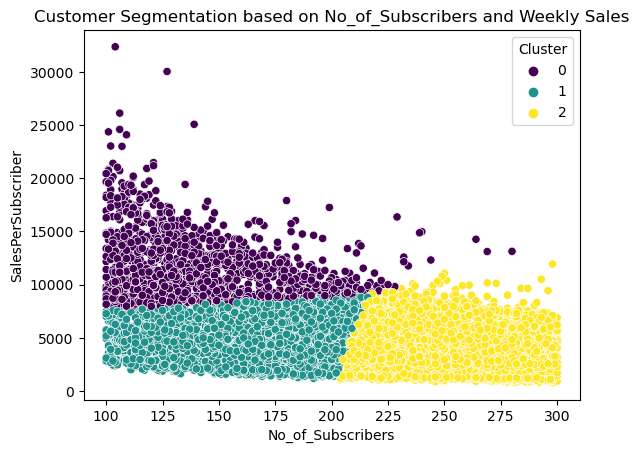

         Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price    CPI  \
Cluster                                                                      
0        18.08    1642880.14          0.08        60.68        3.35 167.81   
1        25.51     767590.43          0.07        60.94        3.36 172.49   
2        23.16    1009191.97          0.07        60.44        3.36 172.49   

         Unemployment  No_of_Subscribers  Sales_per_customer  \
Cluster                                                        
0                7.82             140.98              171.19   
1                8.11             161.29              181.72   
2                7.99             253.93              181.32   

         SalesPerSubscriber  
Cluster                      
0                  11839.17  
1                   4741.68  
2                   3994.66  


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


#read the data file
df = pd.read_csv('C:/Users/anjal/Downloads/WalmartSalesDataset.csv')
df.drop(columns=['Most_Used_Payment_Method', 'Location', 'Season','Date'], inplace=True)


#  Create a feature 'SalesPerSubscriber' as the ratio of Weekly Sales to No_of_Subscribers
df['SalesPerSubscriber'] = df['Weekly_Sales'] / df['No_of_Subscribers']

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['No_of_Subscribers', 'SalesPerSubscriber']])

# Specify the number of clusters at random . We chose three as in the data set we observed 3 types of interies. 
# Weeks with number of subscribers between 100 to 200 ,Weeks with number of subscribers between 200 to 350 and a third cluster which was the sum of the two clusters
n_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)



# Scatter plot
sns.scatterplot(x='No_of_Subscribers', y='SalesPerSubscriber', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segmentation based on No_of_Subscribers and Weekly Sales')
plt.show()

cluster_means = df.groupby('Cluster').mean()
print(cluster_means)

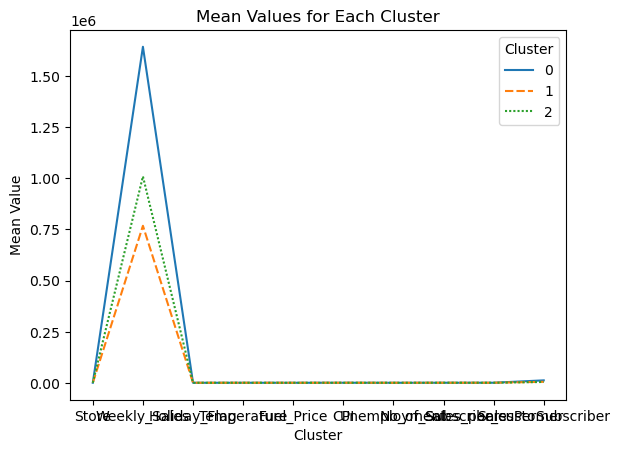

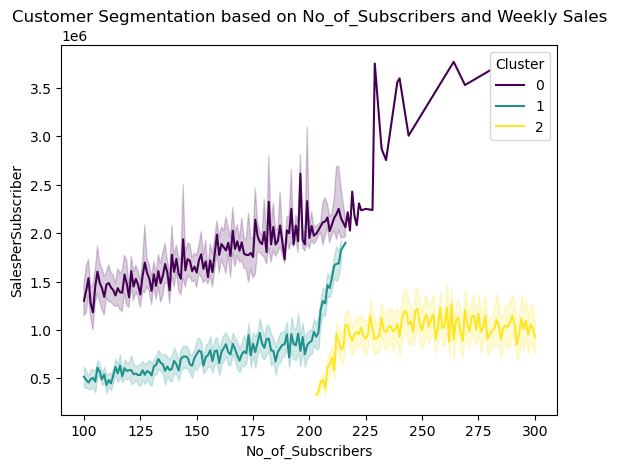

In [34]:
# Line plot for mean values
sns.lineplot(data=cluster_means.T)  # Transpose for better visualization
plt.title('Mean Values for Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.show()

# Line plot for 'No_of_Subscribers' and 'SalesPerSubscriber' for each cluster
sns.lineplot(x='No_of_Subscribers', y='Weekly_Sales', hue='Cluster', data=df, palette='viridis')
plt.title('Customer Segmentation based on No_of_Subscribers and Weekly Sales')
plt.xlabel('No_of_Subscribers')
plt.ylabel('SalesPerSubscriber')
plt.show()